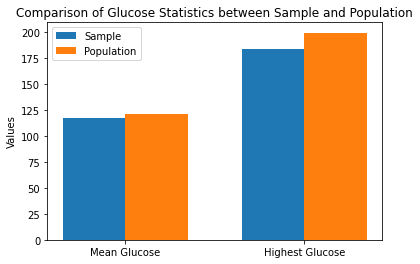

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
url = r"C:\Users\MANOJ\OneDrive\Desktop\PDS_A3\Assign3_2\diabetes.csv"
  # replace with the actual path
data = pd.read_csv(url)

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = data.sample(25)
sample.to_csv(r"C:\Users\MANOJ\OneDrive\Desktop\PDS_A3\Assign3_2\sample_data.csv", index=False)

# Calculate mean and highest Glucose values for both sample and population
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

# Create a bar chart for comparison
variables = ['Mean Glucose', 'Highest Glucose']
sample_values = [sample_mean_glucose, sample_highest_glucose]
population_values = [population_mean_glucose, population_highest_glucose]

# Convert variables to numbers before adding bar_width
x_values = np.arange(len(variables))

fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(x_values, sample_values, bar_width, label='Sample')
bar2 = ax.bar(x_values + bar_width, population_values, bar_width, label='Population')

ax.set_xticks(x_values + bar_width / 2)
ax.set_xticklabels(variables)
ax.set_ylabel('Values')
ax.set_title('Comparison of Glucose Statistics between Sample and Population')
ax.legend()

plt.show()

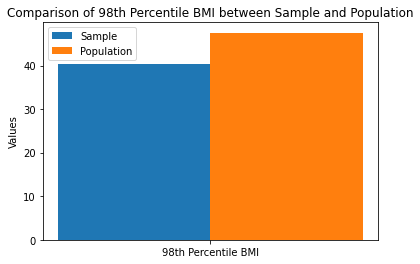

In [8]:
# b) Comparison of 98th Percentile for BMI
# Find the 98th percentile of BMI for both sample and population
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
url = r"C:\Users\MANOJ\OneDrive\Desktop\PDS_A3\Assign3_2\sample_data.csv"
 
sample = pd.read_csv(url)

# Set seed for reproducibility
np.random.seed(42)


sample_percentile_bmi = np.percentile(sample['BMI'], 98)
population_percentile_bmi = np.percentile(data['BMI'], 98)

# Create a bar chart for comparison
variables = ['98th Percentile BMI']
sample_values = [sample_percentile_bmi]
population_values = [population_percentile_bmi]

# Convert variables to numbers before adding bar_width
x_values = np.arange(len(variables))

fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(x_values, sample_values, bar_width, label='Sample')
bar2 = ax.bar(x_values + bar_width, population_values, bar_width, label='Population')

ax.set_xticks(x_values + bar_width / 2)
ax.set_xticklabels(variables)
ax.set_ylabel('Values')
ax.set_title('Comparison of 98th Percentile BMI between Sample and Population')
ax.legend()

plt.show()

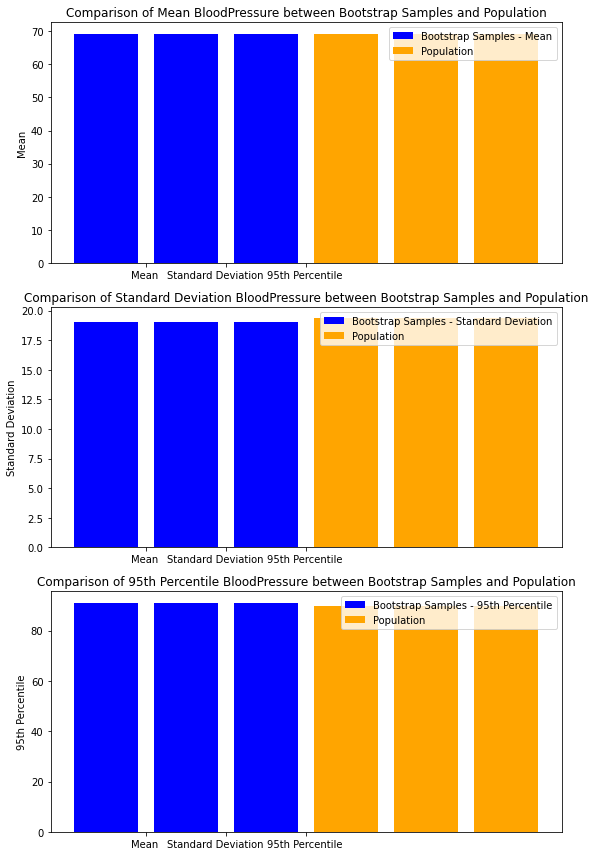

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r"C:\Users\MANOJ\OneDrive\Desktop\PDS_A3\Assign3_2\diabetes.csv"
  # replace with the actual path
data = pd.read_csv(url)

# Set seed for reproducibility
np.random.seed(42)
sample = pd.read_csv(r"C:\Users\MANOJ\OneDrive\Desktop\PDS_A3\Assign3_2\sample_data.csv")



# Create 500 bootstrap samples of 150 observations each for BloodPressure
bootstrap_samples = [data['BloodPressure'].sample(150, replace=True) for _ in range(500)]

# Calculate mean, standard deviation, and 95th percentile for both bootstrap samples and population
bootstrap_means = [sample.mean() for sample in bootstrap_samples]
bootstrap_std_devs = [sample.std() for sample in bootstrap_samples]
bootstrap_percentiles = [np.percentile(sample, 95) for sample in bootstrap_samples]

population_mean_blood_pressure = data['BloodPressure'].mean()
population_std_dev_blood_pressure = data['BloodPressure'].std()
population_percentile_blood_pressure = np.percentile(data['BloodPressure'], 95)

# Create separate bar charts for mean, standard deviation, and 95th percentile
variables = ['Mean ', 'Standard Deviation       ', '95th Percentile ']
x_values = np.arange(len(variables))

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Bar chart for Mean
axs[0].bar(x_values, [np.mean(bootstrap_means)], label='Bootstrap Samples - Mean', color='blue')
axs[0].bar(x_values + len(variables), [population_mean_blood_pressure], label='Population', color='orange')
axs[0].set_xticks(x_values + 0.5)
axs[0].set_xticklabels(variables)
axs[0].set_ylabel('Mean')
axs[0].legend()
axs[0].set_title('Comparison of Mean BloodPressure between Bootstrap Samples and Population')

# Bar chart for Standard Deviation
axs[1].bar(x_values, [np.mean(bootstrap_std_devs)], label='Bootstrap Samples - Standard Deviation', color='blue')
axs[1].bar(x_values + len(variables), [population_std_dev_blood_pressure], label='Population', color='orange')
axs[1].set_xticks(x_values + 0.5)
axs[1].set_xticklabels(variables)
axs[1].set_ylabel('Standard Deviation')
axs[1].legend()
axs[1].set_title('Comparison of Standard Deviation BloodPressure between Bootstrap Samples and Population')

# Bar chart for 95th Percentile
axs[2].bar(x_values, [np.mean(bootstrap_percentiles)], label='Bootstrap Samples - 95th Percentile', color='blue')
axs[2].bar(x_values + len(variables), [population_percentile_blood_pressure], label='Population', color='orange')
axs[2].set_xticks(x_values + 0.5)
axs[2].set_xticklabels(variables)
axs[2].set_ylabel('95th Percentile')
axs[2].legend()
axs[2].set_title('Comparison of 95th Percentile BloodPressure between Bootstrap Samples and Population')

plt.tight_layout()
plt.show()